# Scipy & Stats

In [ ]:
# Poisson example: Estimation of a number of events in an interval
# Number of calls per hour in a call center

import numpy as np
from scipy import stats

# Define average number of events in the interval (calls per hour here)
lambda_ = 3

poisson_dist = stats.poisson(lambda_)

print(f"The probability (PMF) of getting 5 calls in a hour is {round(poisson_dist.pmf(5), 2)}.")



The probability (PMF) of getting 5 calls in a hour is 0.1.


##Plotting probability distributions

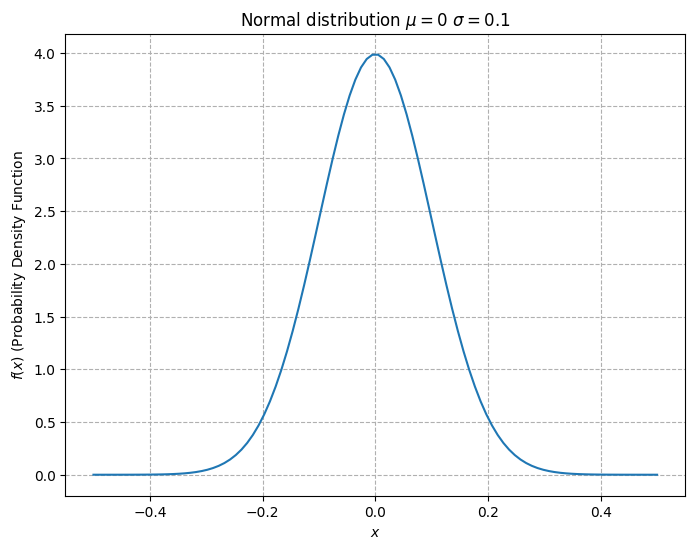

In [ ]:
# Plot the Normal/Gaussian distribution

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Define mean & the standard deviation
mu, sigma = 0, 0.1

# Create our normal distribution object
normal_dist = stats.norm(loc = mu, scale = sigma)

# Plot the visualization
plt.figure(figsize = (8, 6))

x_normal = np.linspace(-0.5, 0.5, 100)
pdf_normal = normal_dist.pdf(x_normal)

plt.plot(x_normal, pdf_normal)

# Customization with LaTex
plt.title(r"Normal distribution $\mu=0$ $\sigma=0.1$")
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$ (Probability Density Function")

plt.grid(True, linestyle = '--')

plt.show()


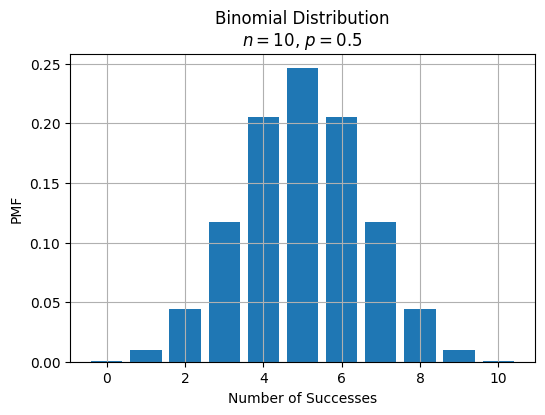

In [ ]:
# Plotting Binomial Distribution

# Define number of trials, probability of each trial
n, p = 10, 0.5

# Create the object
binom_dist = stats.binom(n, p)

# Create the x & y values
x_binom = np.arange(0, n+1)
pmf_binom = binom_dist.pmf(x_binom)

# Plot
plt.figure(figsize=(6, 4))
plt.bar(x_binom, pmf_binom)
plt.title('Binomial Distribution\n$n=10$, $p=0.5$')
plt.xlabel('Number of Successes')
plt.ylabel('PMF')
plt.grid(True)


plt.show()

In [ ]:
# Calculate the probability of getting 7 successes
binom_dist.pmf(7)

0.11718749999999999

PMF for 3 events: 0.22404180765538775


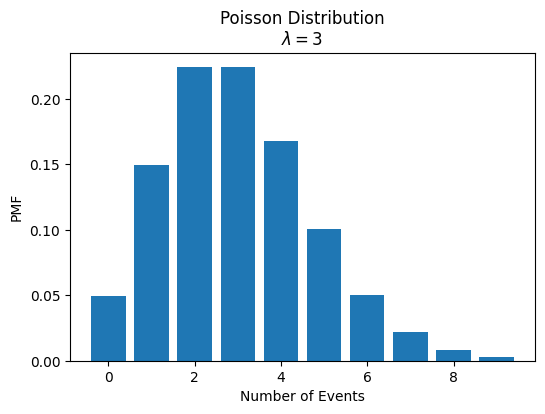

In [ ]:
# Poisson Distribution

# Define the lambda parameter (averge number of occurences per interval)
lambda_ = 3  # rate

# Create the object
poisson_dist = stats.poisson(lambda_)

# Calculate the probability of 3 occurences in an interval
print("PMF for 3 events:", poisson_dist.pmf(3))

# Plotting Poisson Distribution
x_poisson = np.arange(0, 10)
pmf_poisson = poisson_dist.pmf(x_poisson)
plt.figure(figsize=(6, 4))
plt.bar(x_poisson, pmf_poisson)
plt.title('Poisson Distribution\n$\lambda=3$') # LaTex style
plt.xlabel('Number of Events')
plt.ylabel('PMF')
plt.show()

## Hypothesis Testing

### Exercise: Perform a Hypothesis Test

1. Access the plant growth dataset from [Wolfram Data Repository](https://datarepository.wolframcloud.com/resources/Sample-Data-Plant-Growth).

2. Use a T-test to determine if different fertilizers significantly affect plant growth.

3. Analyze and interpret the test results.

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/Sample-Data-Plant-Growth.csv')

df.head()

,Weight,Group
0,4.17,control
1,5.58,control
2,5.18,control
3,6.11,control
4,4.50,control


In [ ]:
# Check the categories
df['Group'].unique()

array(['control', 'treatment1', 'treatment2'], dtype=object)

In [ ]:
from scipy import stats

# Separate group values
groups = df.groupby('Group')['Weight']
control = groups.get_group('control')
treatment1 = groups.get_group('treatment1')
treatment2 = groups.get_group('treatment2')

# Perform tests
t_stat_t1, p_value_1 = stats.ttest_ind(control, treatment1)
t_stat_t2, p_value_2 = stats.ttest_ind(control, treatment2)

# Define the alpha
alpha = 0.05

if p_value_1 < alpha:
  print(f"With a p_value of {p_value_1}, we consider that treatment 1 significantly affects the plant growth, and we can reject the null hypothesis.")
else:
  print(f"Treatment 1 doesn't significantly affect the plant growth ({p_value_1}).")

if p_value_2 < alpha:
  print(f"With a p_value of {p_value_2}, we consider that treatment 2 significantly affects the plant growth, and we can reject the null hypothesis.")
else:
  print(f"Treatment 2 doesn't significantly affect the plant growth.")


Treatment 1 doesn't significantly affect the plant growth (0.2490231659730067).
With a p_value of 0.04685138491157358, we consider that treatment 2 significantly affects the plant growth, and we can reject the null hypothesis.


# Statistical Data Modeling in SciPy

## Exercise 1: Linear Regression Analysis (Coding Exercise)


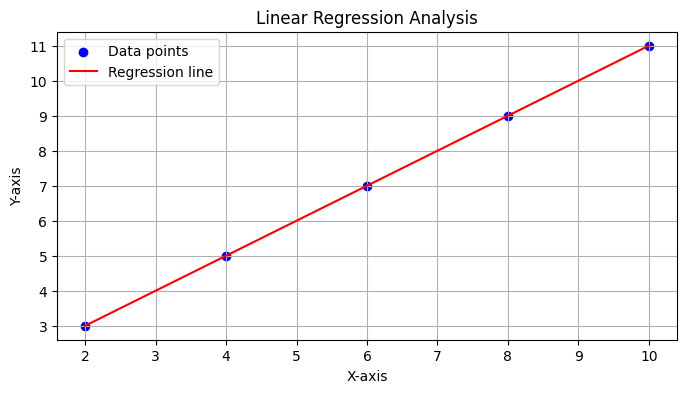

In [ ]:
# Import packages
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Define the dataset
x = np.array([2, 4, 6, 8, 10])
y = np.array([3, 5, 7, 9, 11])

# Apply the linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Plot the data points & the regression line
plt.figure(figsize = (8, 4))

plt.scatter(x, y, color = 'blue', label = 'Data points')
plt.plot(x, slope * x + intercept, color = 'red', label = 'Regression line')

plt.title('Linear Regression Analysis')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.legend()

plt.show()


## ANOVA

F-value: 60.48275862068964
P-value: 5.403228229488652e-07


{'whiskers': [<matplotlib.lines.Line2D at 0x7b3e1c105c00>,
 'caps': [<matplotlib.lines.Line2D at 0x7b3e1c1061a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b3e1c105870>,
 'medians': [<matplotlib.lines.Line2D at 0x7b3e1bc40220>,
 'fliers': [<matplotlib.lines.Line2D at 0x7b3e1bc429b0>,
 'means': []}

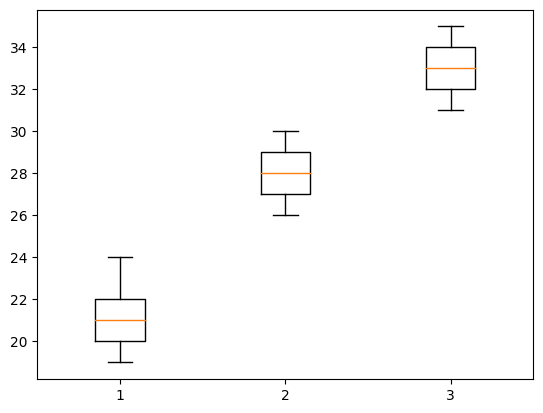

In [ ]:
from scipy import stats
import matplotlib

# Sample data from three different groups
group1 = [20, 21, 19, 22, 24]
group2 = [28, 30, 27, 26, 29]
group3 = [33, 35, 34, 31, 32]

data = [group1, group2, group3]

# Performing one-way ANOVA
f_value, p_value = stats.f_oneway(group1, group2, group3)
print("F-value:", f_value)
print("P-value:", p_value)

plt.boxplot(data)

# Correlation & Covariance with Scipy

In [ ]:
import pandas as pd

data = pd.DataFrame({
    'Age': [25, 40, 30, 22, 35],
    'Monthly_Income': [3200, 5800, 4500, 2800, 5000],
    'Online_Purchase_Frequency': [15, 8, 12, 18, 10],
    'Hours_Social_Media': [30, 15, 25, 40, 20]
})

In [ ]:
# Pearson Correlation
from scipy import stats


# Calculate Pearson Correlation between Monthly Income and Online Purchase Frequency
corr, _ = stats.pearsonr(data['Monthly_Income'], data['Online_Purchase_Frequency'])

print(f'Pearson Correlation Coefficient: {corr:.2f}')


Pearson Correlation Coefficient: -0.99


In [ ]:
corr

-0.9865984435649771

## Spearman Rank Correlation

In [ ]:
# Calculate Spearman Rank Correlation between Age and Hours Spent on Social Media
sp_corr, _ = stats.spearmanr(data['Age'], data['Hours_Social_Media'])
print(f'Spearman Rank Correlation: {sp_corr:.2f}')

Spearman Rank Correlation: -1.00


## Computing Covariance

In [ ]:
# Calculate Covariance between Age and Monthly Income
covariance = np.cov(data['Age'], data['Monthly_Income'])[0, 1]
print(f'Covariance: {covariance:.2f}')

Covariance: 9020.00
